In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [77]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [78]:
df
print(df.shape)

(10000, 14)


In [79]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [82]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [83]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [84]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [85]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [86]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df.shape

(10000, 11)

In [88]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [89]:
X = df.drop(columns=["Exited"])
y= df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [90]:
X_train.shape

(8000, 11)

In [91]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaler = scaler.fit_transform(X_train)
test_scaler = scaler.transform(X_test)

In [92]:
train_scaler 

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [93]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [94]:
model = Sequential()
model.add(Dense(3, activation="sigmoid",input_dim=11))
model.add(Dense(1, activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [112]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8000 - loss: 0.4992 - val_accuracy: 0.7975 - val_loss: 0.4973
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.5071 - val_accuracy: 0.7975 - val_loss: 0.4973
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.5051 - val_accuracy: 0.7975 - val_loss: 0.4973
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.5101 - val_accuracy: 0.7975 - val_loss: 0.4973
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.5057 - val_accuracy: 0.7975 - val_loss: 0.4973
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - loss: 0.4844 - val_accuracy: 0.7975 - val_loss: 0.4973
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.5031 - val_accuracy: 0.7975 - val_loss: 0.4973
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4957 - val_accu

In [98]:
model.layers[0].get_weights()

[array([[-0.16659467, -0.14119695,  0.53064525],
        [-0.02715603, -0.60423213,  0.0521995 ],
        [ 0.50485045, -0.35467815,  0.24802652],
        [-0.38866943,  0.5882964 ,  0.5772569 ],
        [-0.08778614, -0.6358545 , -0.13298567],
        [ 0.0637883 ,  0.59198767,  0.1113381 ],
        [ 1.0685824 ,  0.5854617 , -0.5749255 ],
        [ 0.12305239,  0.5630143 , -0.44534662],
        [ 0.1553663 , -0.63322914,  0.49239078],
        [ 0.3465917 ,  0.43349946,  0.5715687 ],
        [-0.212596  , -0.36710876,  0.43516046]], dtype=float32),
 array([0.04280556, 0.00011277, 0.04380333], dtype=float32)]

In [99]:
model.layers[1].get_weights()

[array([[-0.70396644],
        [-0.6730706 ],
        [-0.03339915]], dtype=float32),
 array([-0.4477492], dtype=float32)]

In [104]:
y_predict = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [101]:
y_predict

array([[0.13886057],
       [0.23971933],
       [0.13886057],
       ...,
       [0.13886057],
       [0.24585927],
       [0.23971933]], dtype=float32)

In [106]:
y_pred = y_predict.argmax(axis=-1)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [113]:
history.history

{'accuracy': [0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574

In [114]:
import matplotlib.pyplot as plt

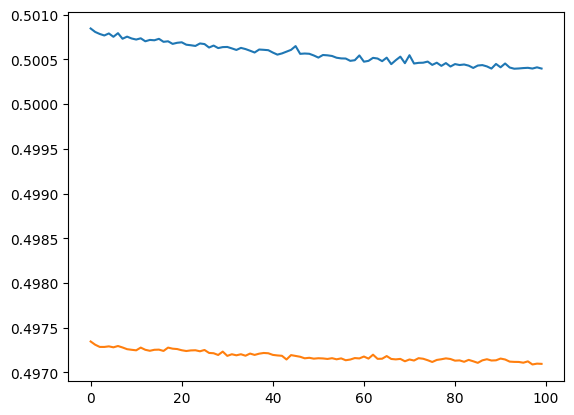

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

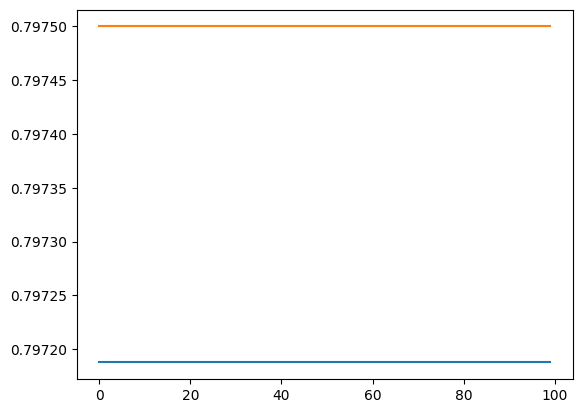

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])